## esto es ya processing, hay que ver donde meterlo

In [15]:
import os
import pandas as pd
import librosa as lbrs
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [13]:
## Load oggs into wav format, save them in "wavs" array and in 'database/assets/wav'

# defining params

wavs=[]

csv_path = os.path.join(os.pardir, 'database', 'meta', 'train_data.csv') # ../database/meta/train_data.csv
abs_csv_path = os.path.abspath(csv_path)    # /home/.../database/meta/train_data.csv
train_metadata=pd.read_csv(abs_csv_path)

output_dir = os.path.join(os.pardir, 'database', 'assets', 'wav') 
output_dir = os.path.abspath(output_dir) 

input_dir = os.path.join(os.pardir, 'database', 'assets', 'raw')
input_dir = os.path.abspath(input_dir)

# action below

for row in train_metadata.itertuples(index=False):
    filename = row.filename
    class_id = row.class_id
    audio_path = os.path.join(input_dir, filename)
    
    wav, srate = lbrs.load(audio_path, sr=None)
    duration = len(wav) / srate
    wavs.append(wav)

    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, filename.replace('.ogg', '.wav'))
    sf.write(output_path, wav, srate)

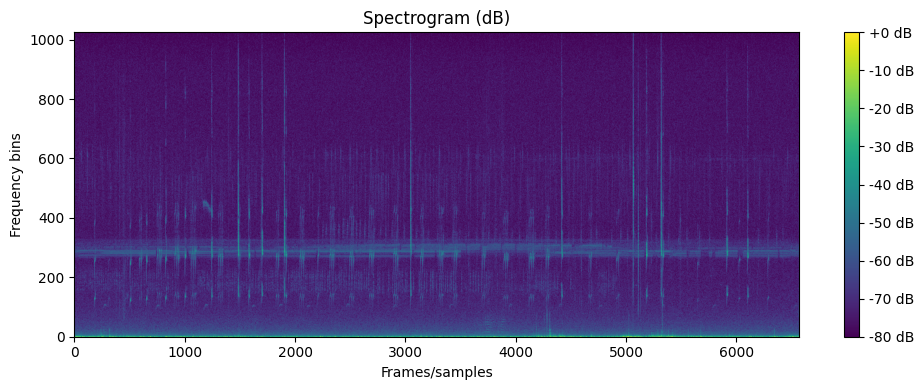

In [16]:
pajaro=wavs[0]

# fourier -> espectograma en db -> grafico

ffourier=lbrs.stft(pajaro)
S_db = lbrs.amplitude_to_db(np.abs(ffourier), ref=np.max)          # spectogram in dB

plt.figure(figsize=(10, 4))
plt.imshow(S_db, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.xlabel('Frames/samples')
plt.ylabel('Frequency bins')
plt.tight_layout()
plt.show()

In [17]:
# calculo de energia para este pajaro. revisar hop
hop=1
rms = lbrs.feature.rms(S=ffourier, hop_length=hop)  # root-mean-square value for each window, hop-length es la cantidad de frames de audio que se usan para calcular cada valor de energía
print("La energia de este pájaro en cada ventana de", hop,"frames =", rms)
print("La suma de las energías =", np.sum(rms))

La energia de este pájaro en cada ventana de 1 frames = [[0.00258874 0.01173187 0.01817327 ... 0.0729082  0.05766995 0.02939613]]
La suma de las energías = 228.7935293834212
